# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preprocessing

In [2]:
#Reading data
df = pd.read_csv("iris.csv")
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Removing the Id column from our dataset as it is not needed to peform EDA (Exploratory Data Analysis).

In [3]:
df.drop("Id", axis=1, inplace=True) #Removing the unnecessary ID column as we're already provided with a default row number.

In [4]:
df.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']

In [5]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Getting some basic idea about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#^^
df.describe

<bound method NDFrame.describe of      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
#Checking for null values
df.isnull().any()

Sepal_Length    False
Sepal_Width     False
Petal_Length    False
Petal_Width     False
Species         False
dtype: bool

# Data Visualization!

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

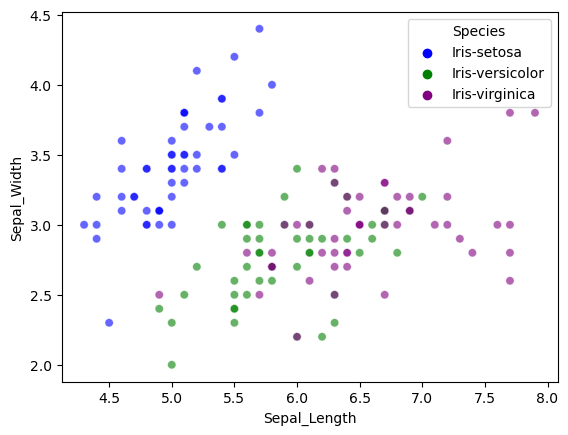

In [9]:
#Scatterplot to visualize the distribution of the Parameters
colors = ['Blue','Green','Purple']
sns.scatterplot(df, x="Sepal_Length", y="Sepal_Width", palette = colors, hue='Species', alpha=0.6, zorder=3)

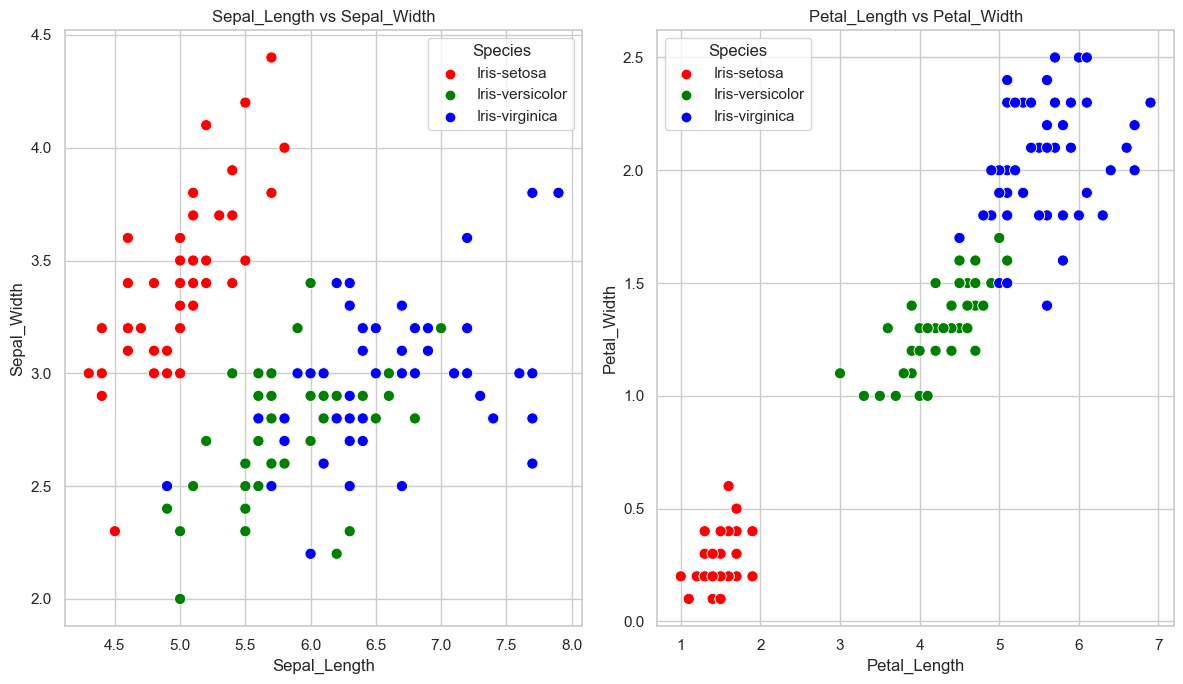

In [10]:
#Bivariate Analysis of Petal And Sepal Parameters to understand the spread of data any visual inferences
colors = ["Red", "Green", "Blue"]
variable_pairs = [('Sepal_Length', 'Sepal_Width'), ('Petal_Length', 'Petal_Width')]

sns.set(style="whitegrid")
sns.set_palette(colors)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
ax1, ax2 = axes

for i, pair in enumerate(variable_pairs):
    sns.scatterplot(x=pair[0], y=pair[1], hue='Species', data=df, s=65, ax=axes[i])

    axes[i].set_title(f'{pair[0]} vs {pair[1]}')
    axes[i].set_xlabel(pair[0])
    axes[i].set_ylabel(pair[1])

plt.tight_layout()
plt.show()


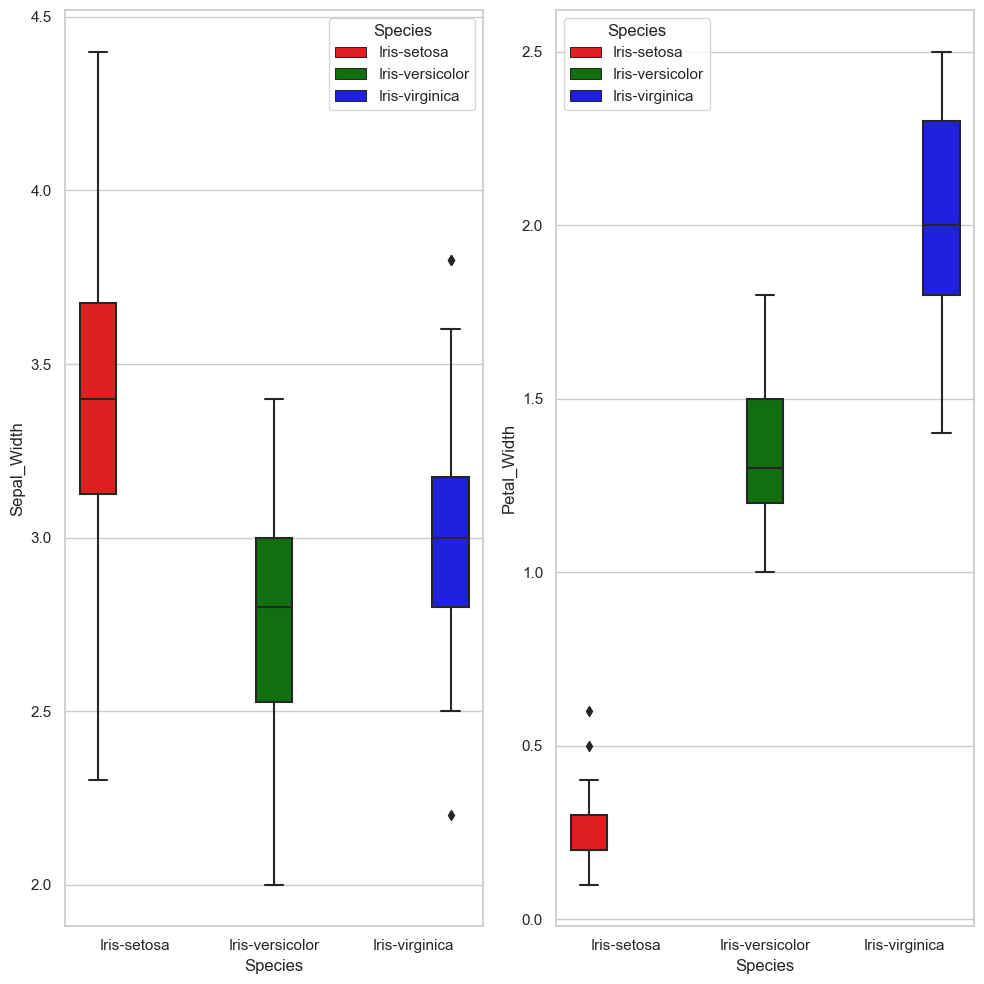

In [40]:
# Creating subplots with two rows and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# Creating a loop to generate scatterplots and adding them to subplots
for i, pair in enumerate(variable_pairs):
    sns.boxplot(x='Species', y=pair[1], data=df, hue='Species', ax=axes[i])  # Adding 'hue' for differentiating species
    


# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

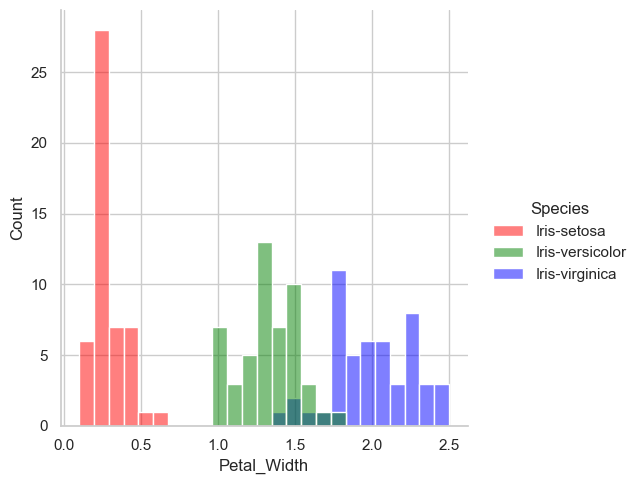

In [12]:
sns.displot(df, x='Petal_Width', hue='Species', kind='hist', bins=25, palette=colors)

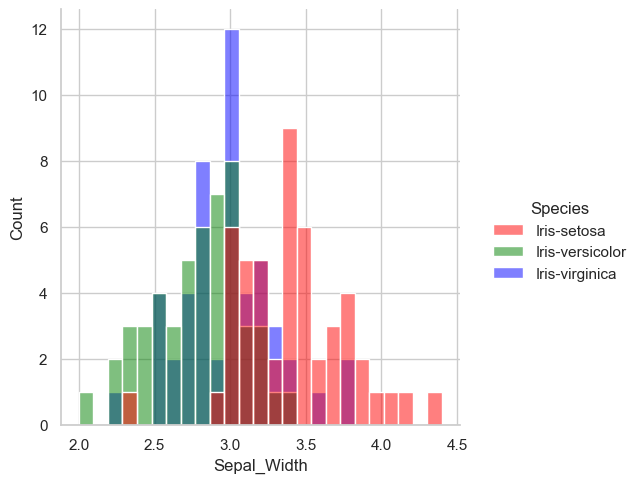

In [13]:
sns.displot(df, x='Sepal_Width', hue='Species', kind='hist', bins=25, palette=colors)

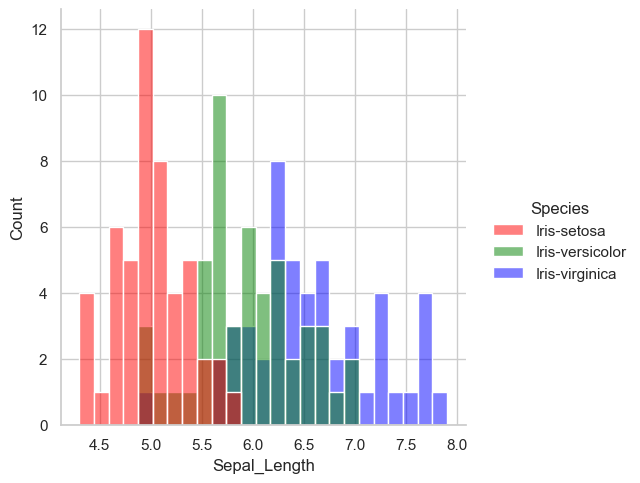

In [14]:
sns.displot(df, x='Sepal_Length', hue='Species', kind='hist', bins=25, palette=colors)

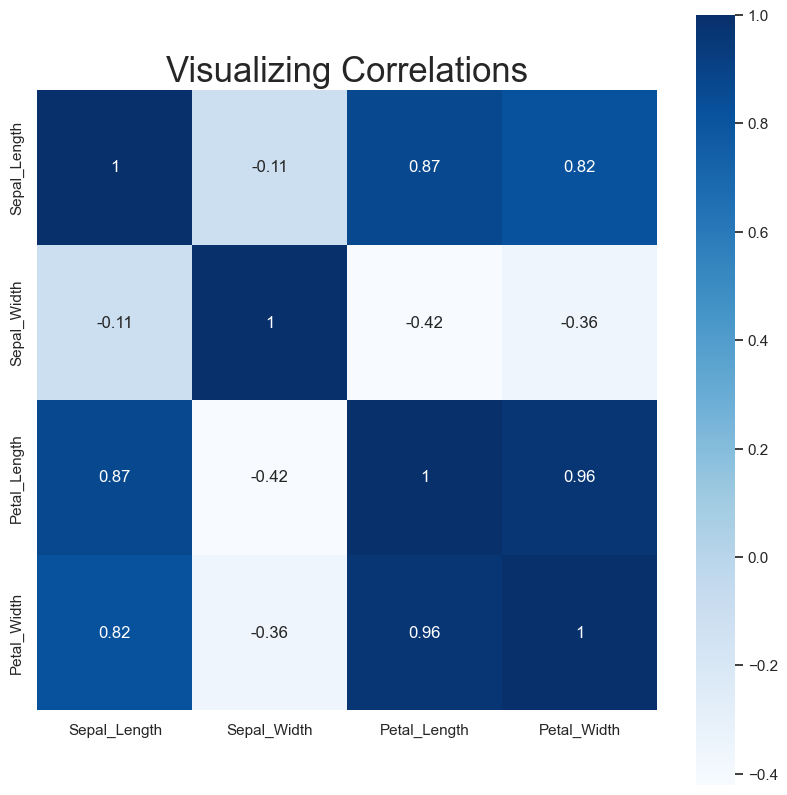

In [15]:
#Plotting a Correlation Matrix to see the correlation of different variables with each other
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 25)
plt.show()

# Splitting the Data into Train and Test Datasets

In [16]:
X = df.drop(['Species'], axis = 1)
y = df['Species']

# Encoding the Species Column to train our Model

In [17]:
y=y.map({"Iris-setosa":1,"Iris-virginica":2,"Iris-versicolor":3})
y

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle=True)

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")


The accuracy for Logistic Regression is: 96.66666666666667 %


In [27]:
cl_rep=classification_report(y_test, y_pred)

In [28]:
#Printing the classification report for the predictions, to get a deeper insight 
print("\nThe classification report for " +" Logistic Regression  is:", cl_rep, sep = "\n")


The classification report for  Logistic Regression  is:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



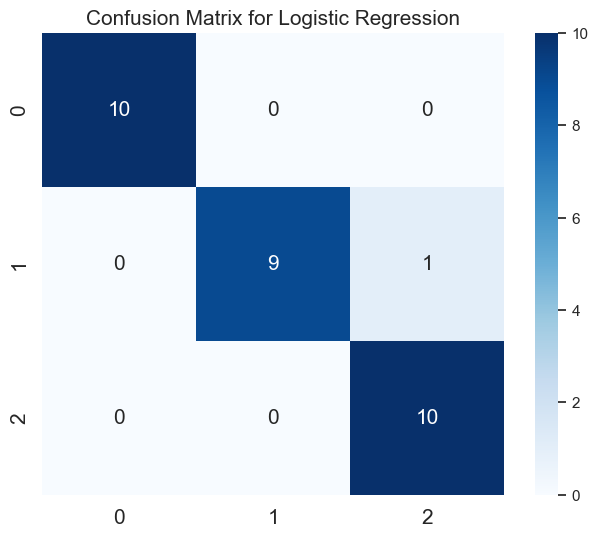

In [29]:
#Ploting the confusion matrix for the predicted values
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
plt.title('Confusion Matrix for Logistic Regression', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()    

# End of the Project!